In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings("ignore") 

%matplotlib inline

In [109]:
def get_distribution(col_name, data, model):
    x = data.copy()
    sequence = np.linspace(np.min(data[col_name]), np.max(data[col_name]), len(data[col_name]))
    y_dist = []
    ice_avgs = []
    for elem in sequence:
        x[col_name] = elem
        y_temp = model.predict(x)
        y_dist.append(np.mean(y_temp))
        
        ice_avgs.append(y_temp)
        
    return sequence, y_dist, ice_avgs


def plot_PDP(col_name, data, y, model, xlabel, ylabel):
    plt.figure(figsize = (10, 8))
    plt.grid()
    res = get_distribution(col_name, data, model)
    plt.plot(res[0], res[1], lw = 2, label = 'Trend')
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    plt.ylim(min(y), max(y))
    plt.legend(fontsize = 'large')
    plt.tight_layout()
    

def plot_ICE(col_name, data, y, model, xlabel, ylabel):
    res = get_distribution(col_name, data, model)
    x = res[0]
    ice_avgs = res[2]
    plt.figure(figsize = (12, 8))
    plt.grid()
    for row in range(len(ice_avgs[0])):
        ys = []
        for item in range(len(ice_avgs)):
            ys.append(ice_avgs[item][row])
        plt.plot(x, ys, c = 'black', alpha = 0.1)
        
    plt.plot(res[0], res[1], lw = 5, c = 'r', label = 'Avg. Trend (PDP)')
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.ylim(min(y), max(y))
    plt.legend(fontsize = 'large')
    plt.tight_layout()

In [81]:
# Creating features
x1 = [np.random.normal(15, 2) for x in range(1000)]
x2 = [math.sin(x) for x in x1]
x3 = [(2*x)+1 for x in x1]
x4 = [np.random.normal(0.3, 1.5) for x in range(1000)]

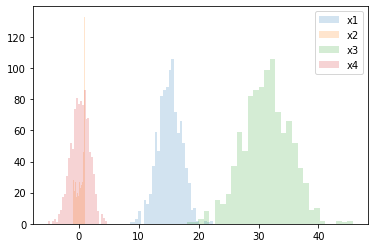

In [82]:
plt.hist(x1, alpha = 0.2, label = 'x1', bins = 30)
plt.hist(x2, alpha = 0.2, label = 'x2', bins = 30)
plt.hist(x3, alpha = 0.2, label = 'x3', bins = 30)
plt.hist(x4, alpha = 0.2, label = 'x4', bins = 30)
plt.legend()

In [83]:
# Adding label
y = [v + x + y + z for (v, x, y, z) in list(zip(x1, x2, x3, x4))]

In [84]:
# Creating Dataframe
df = pd.DataFrame({"x1": x1, "x2": x2, "x3": x3, "x4": x4, "y": y})

In [85]:
df.head()

,x1,x2,x3,x4,y
0,16.389908,-0.630304,33.779816,0.371559,49.910980
1,16.986877,-0.957704,34.973753,-0.939227,50.063699
2,16.344953,-0.594778,33.689906,1.029038,50.469119
3,14.061505,0.997139,29.123011,2.408588,46.590244
4,13.082223,0.493277,27.164446,1.995718,42.735664


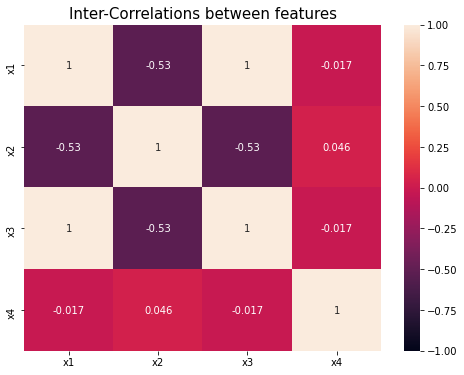

In [102]:
# Visualizing Correlations
plt.figure(figsize=(8, 6))
sns.heatmap(df.iloc[:, :-1].corr(method="spearman"), annot=True, vmax=1, vmin=-1)
plt.title("Inter-Correlations between features", fontsize = 15)
plt.show()

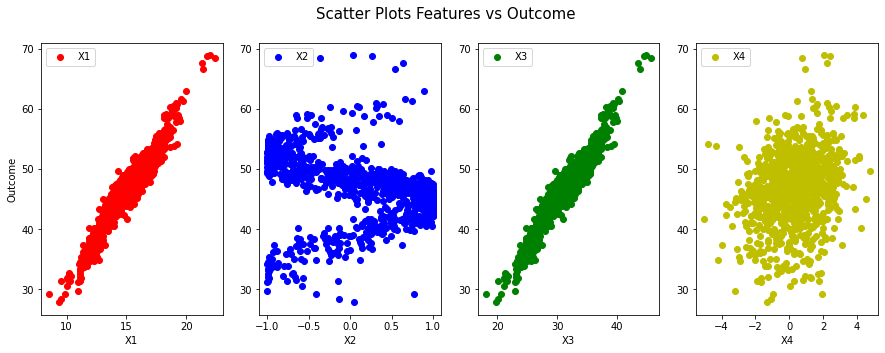

In [90]:
# # Visualizing Scatter plot for Outliers
fig, axis = plt.subplots(1, df.iloc[:, :-1].shape[1], figsize=(15,5))
labels = ['x1', 'x2', 'x3', 'x4']
c = ['r', 'b', 'g', 'y']
features = [x1, x2, x3, x4]
axis[0].set_ylabel("Outcome")
fig.suptitle('Scatter Plots Features vs Outcome', fontsize = 15)
for i in range(len(labels)):
    axis[i].set_xlabel(labels[i].upper())
    axis[i].scatter(features[i], y, label=labels[i].upper(), c=c[i])
    axis[i].legend()

In [112]:
# Cleaning up
# scaled_vals = StandardScaler().fit_transform(df.iloc[:, :-1])
# scaled_df = pd.DataFrame(scaled_vals, columns=['x1', 'x2', 'x3', 'x4'])
scaled_vals = StandardScaler().fit_transform(df[['x1', 'x4']])
scaled_df = pd.DataFrame(scaled_vals, columns=['x1', 'x4'])
scaled_df['y'] = y
scaled_df

X = scaled_df.iloc[:, :-1]
y = scaled_df.iloc[:, -1]

In [113]:
scaled_df.head()

,x1,x4,y
0,0.631813,0.056136,49.910980
1,0.938355,-0.808004,50.063699
2,0.608729,0.489581,50.469119
3,-0.563814,1.399054,46.590244
4,-1.066673,1.126868,42.735664


In [114]:
# Building Model
est = RandomForestRegressor()
est.fit(X, y)

RandomForestRegressor()

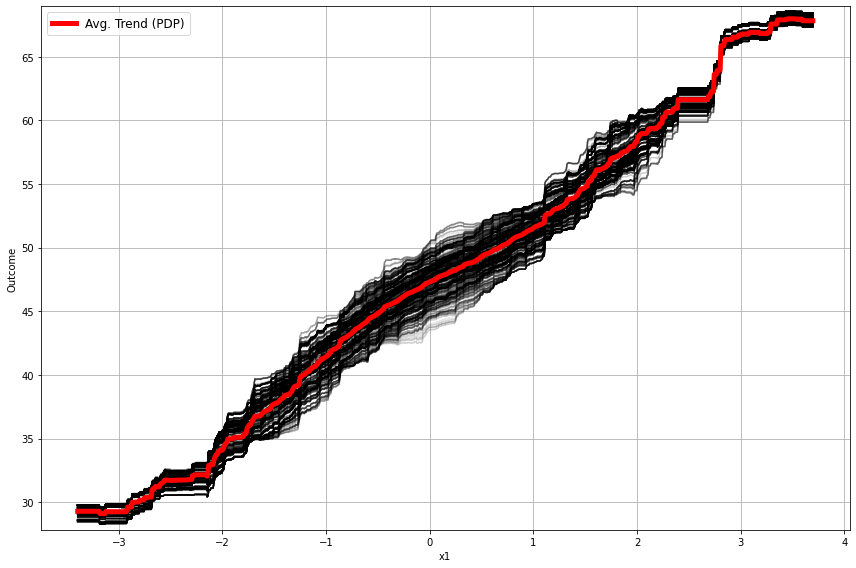

In [115]:
# Analyzing PDP plots
plot_ICE('x1', X, y, est, 'x1', 'Outcome')